АНАЛИЗ ДАННЫХ BOSTON HOUSING

Обнаружены данные в одной колонке. Разделяем...
Размер данных: (506, 14)
Количество признаков: 14
Количество наблюдений: 506

Пропущенные значения: 5

Строки с пропущенными значениями:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Пропущенные значения заполнены медианами
ОПИСАТЕЛЬНАЯ СТАТИСТИКА
         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00 

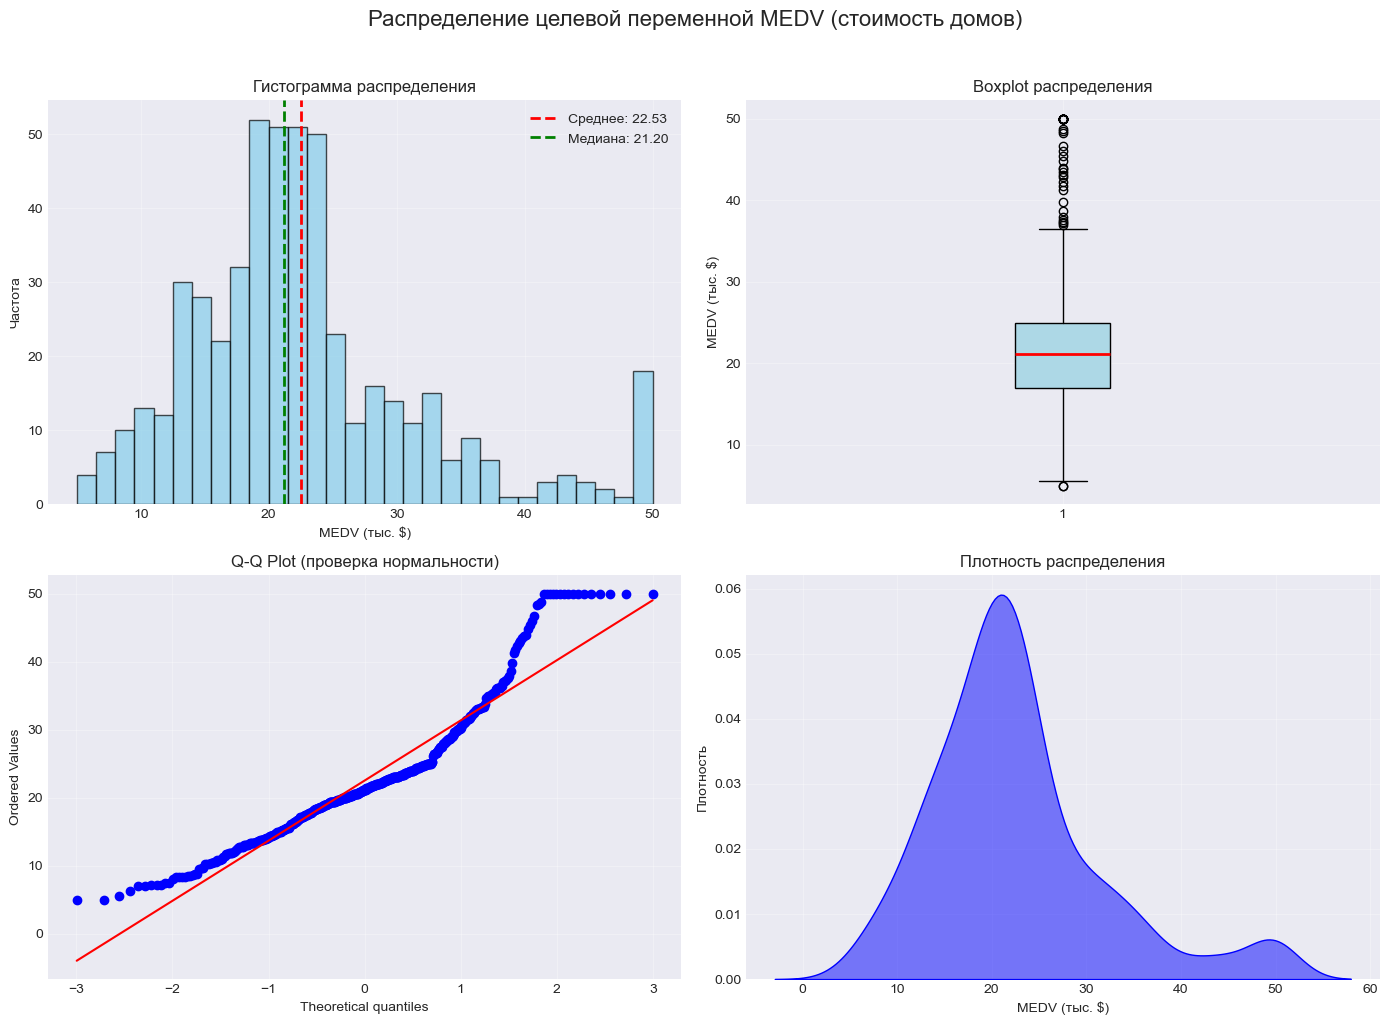


Статистика по MEDV:
  Среднее: 22.53
  Медиана: 21.20
  Стандартное отклонение: 9.20
  Минимум: 5.00
  Максимум: 50.00
  Коэффициент вариации: 40.8%
  Асимметрия: 1.108
  Эксцесс: 1.495
РАСПРЕДЕЛЕНИЕ ВСЕХ ПРИЗНАКОВ


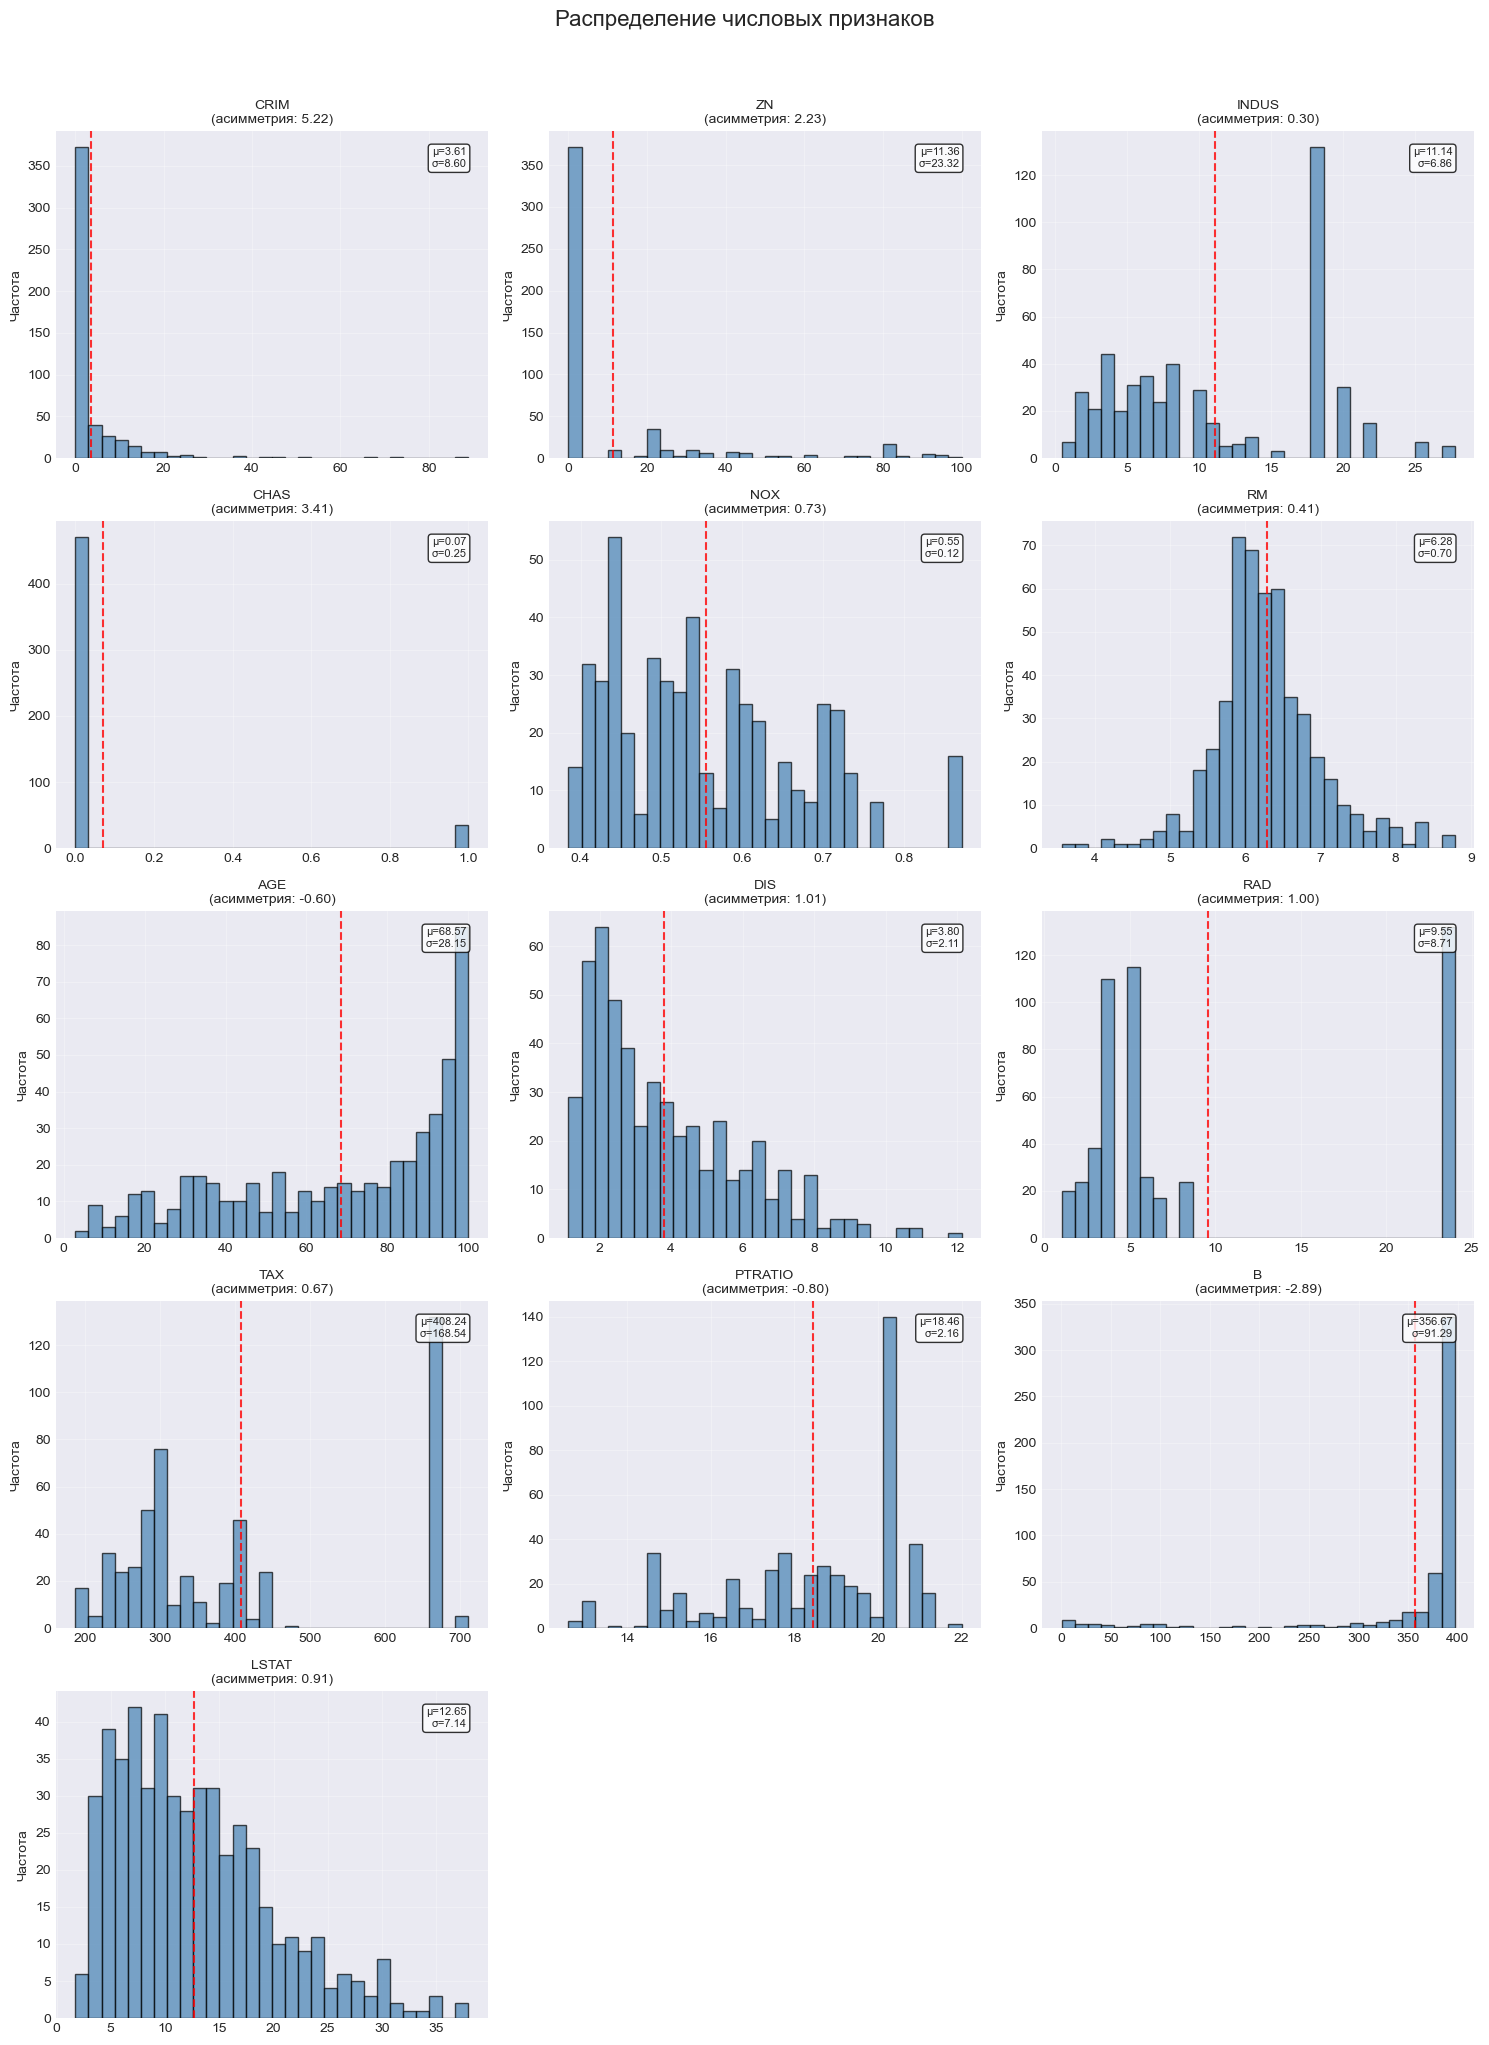

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ


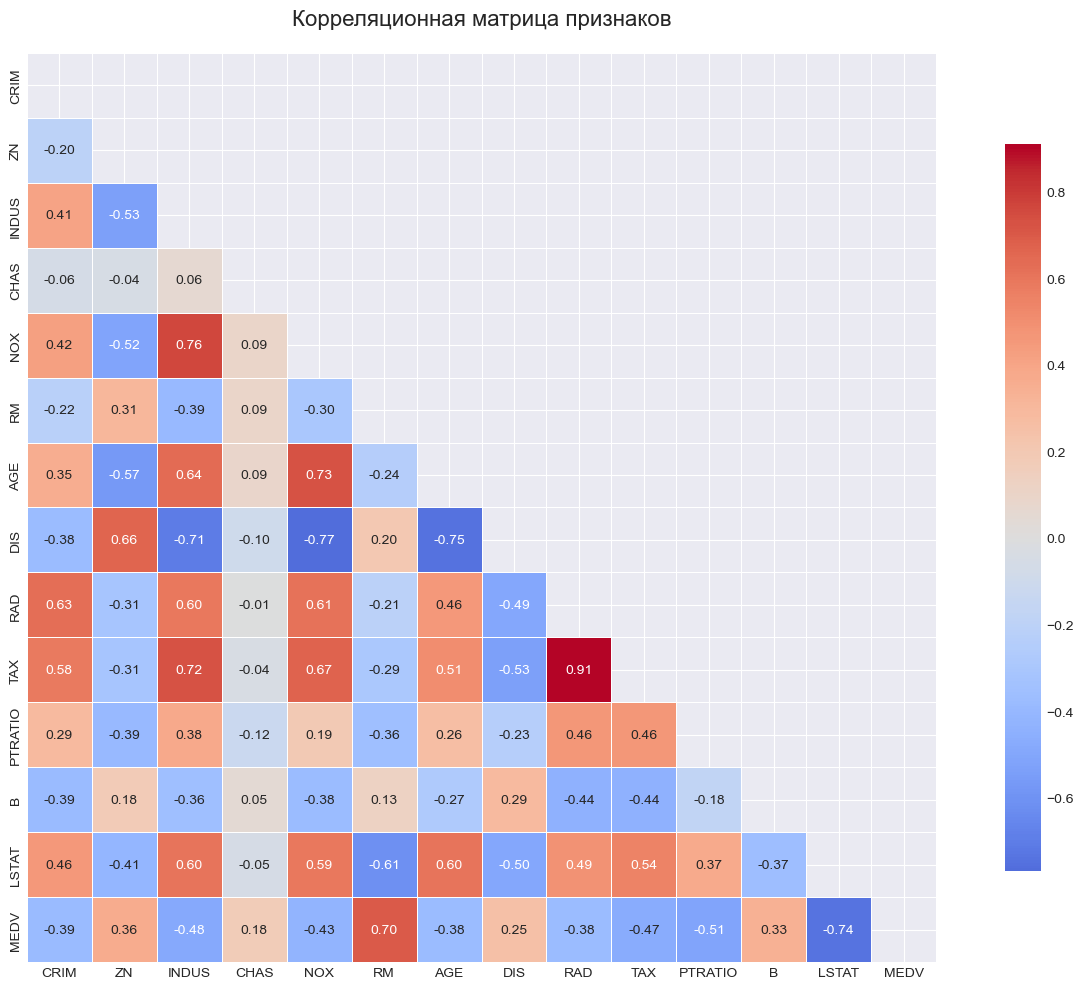


Корреляция признаков с MEDV (стоимостью домов):
MEDV       1.000
RM         0.696
ZN         0.360
B          0.333
DIS        0.250
CHAS       0.175
AGE       -0.377
RAD       -0.382
CRIM      -0.388
NOX       -0.427
TAX       -0.469
INDUS     -0.484
PTRATIO   -0.508
LSTAT     -0.738
Name: MEDV, dtype: float64


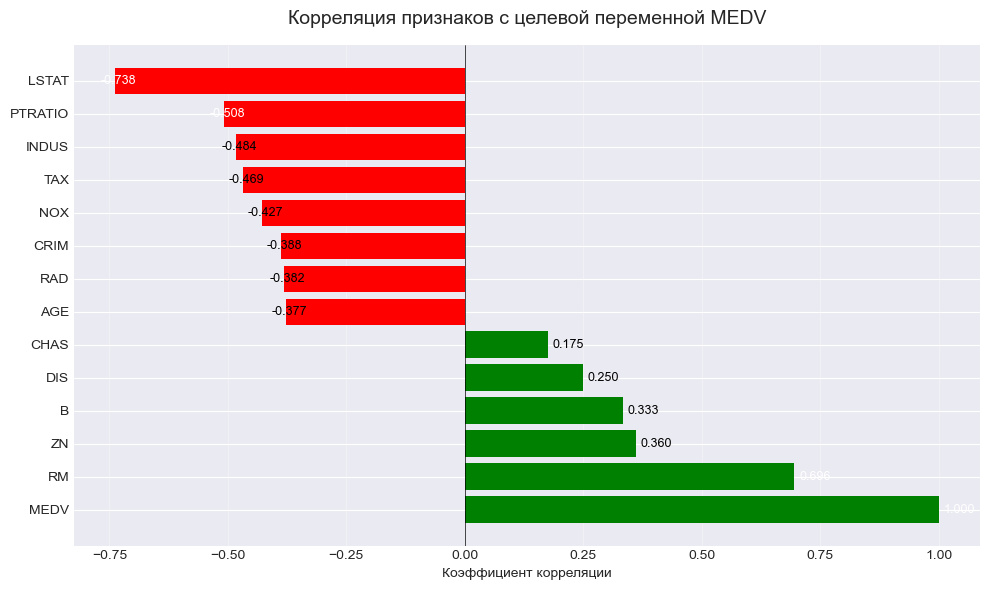

ВИЗУАЛИЗАЦИЯ СВЯЗИ КЛЮЧЕВЫХ ПРИЗНАКОВ С MEDV


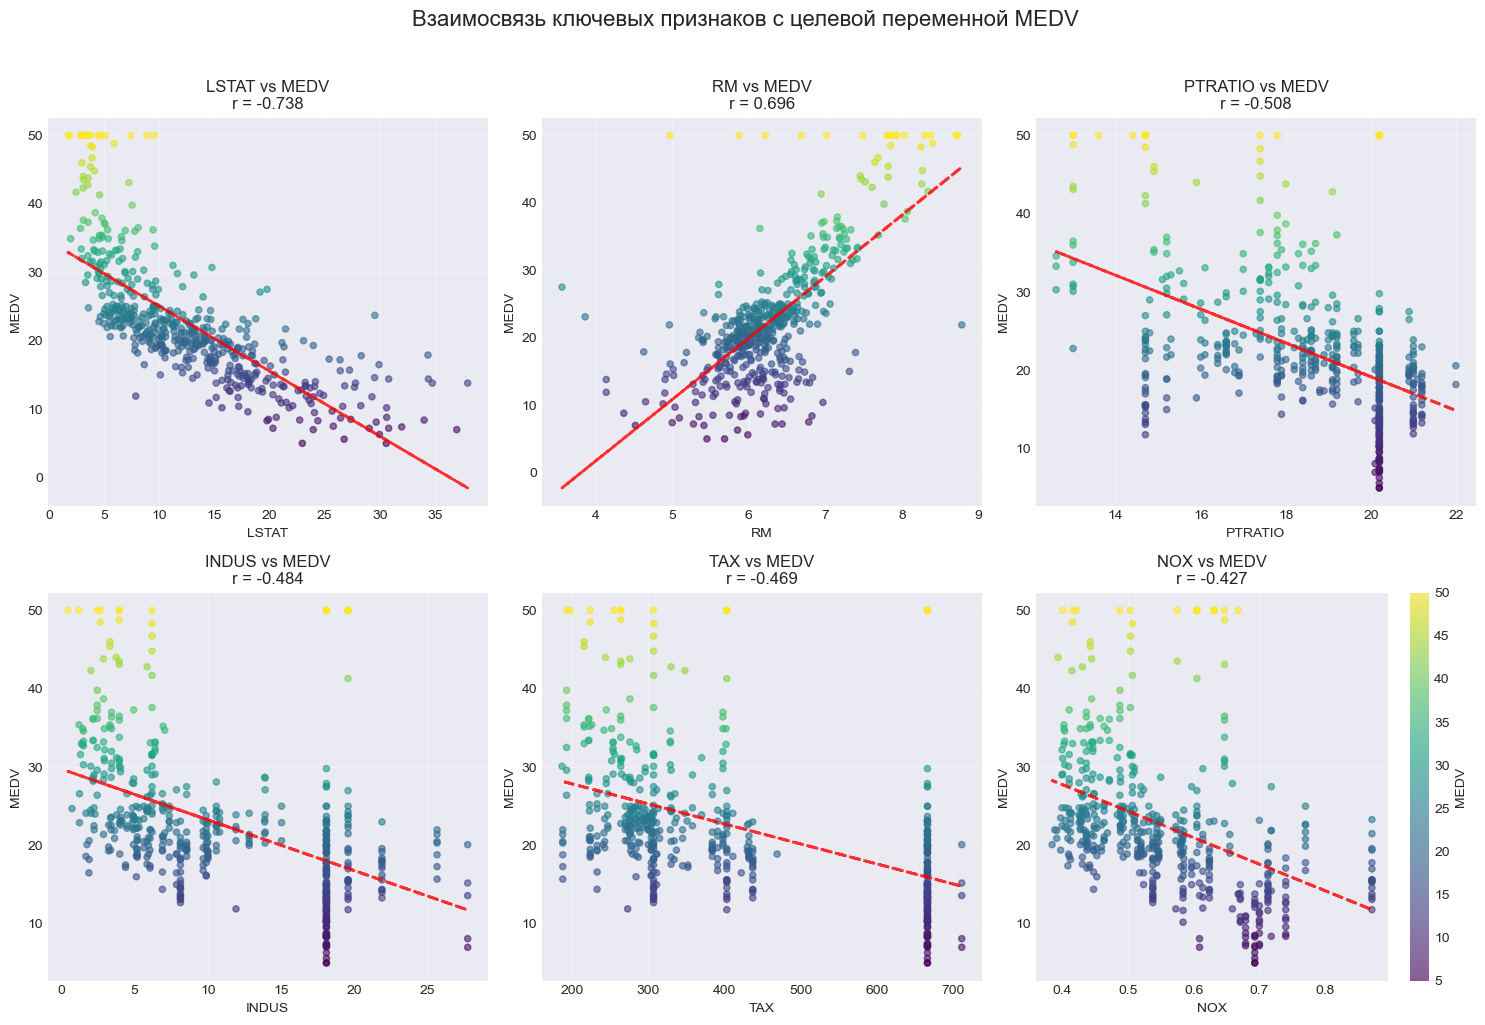

АНАЛИЗ ВЫБРОСОВ


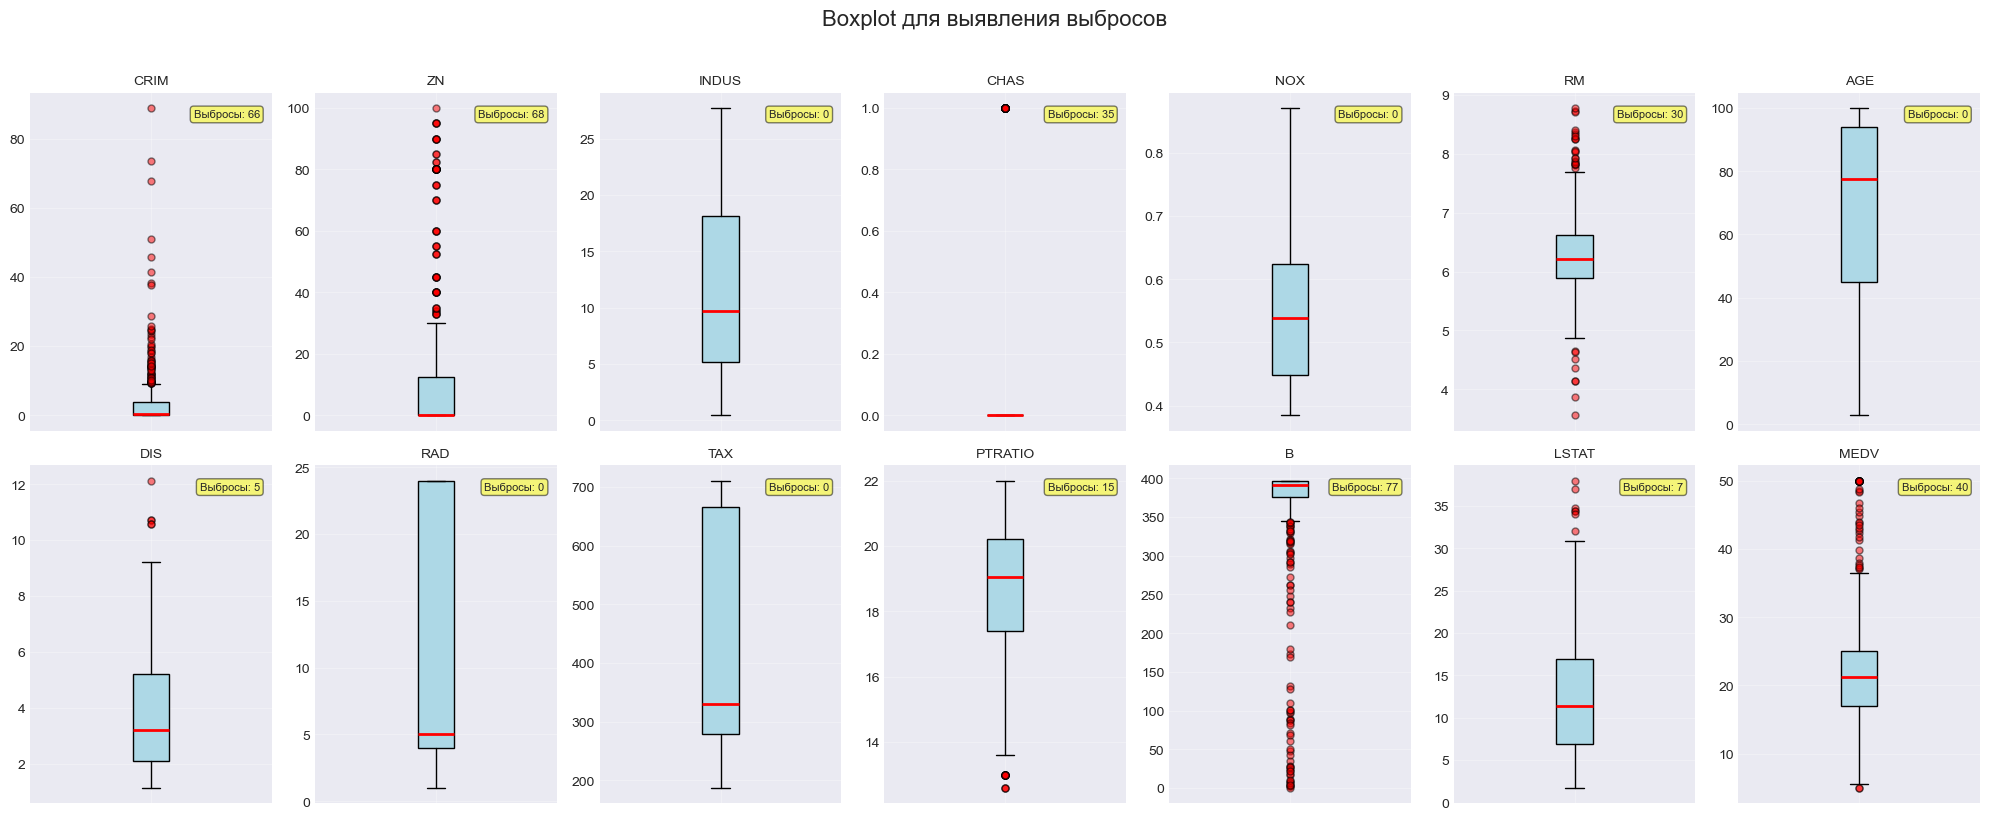


Количество выбросов по признакам (метод IQR):
  CRIM: 66 выбросов (13.0%)
  ZN: 68 выбросов (13.4%)
  CHAS: 35 выбросов (6.9%)
  RM: 30 выбросов (5.9%)
  DIS: 5 выбросов (1.0%)
  PTRATIO: 15 выбросов (3.0%)
  B: 77 выбросов (15.2%)
  LSTAT: 7 выбросов (1.4%)
  MEDV: 40 выбросов (7.9%)
ПАРНЫЕ ГРАФИКИ ДЛЯ ВЫСОКОКОРРЕЛИРОВАННЫХ ПРИЗНАКОВ

Найдено 8 пар с корреляцией > |0.7|:
  INDUS - NOX: 0.764
  INDUS - DIS: -0.708
  INDUS - TAX: 0.721
  NOX - AGE: 0.731
  NOX - DIS: -0.769
  AGE - DIS: -0.748
  RAD - TAX: 0.910
  LSTAT - MEDV: -0.738


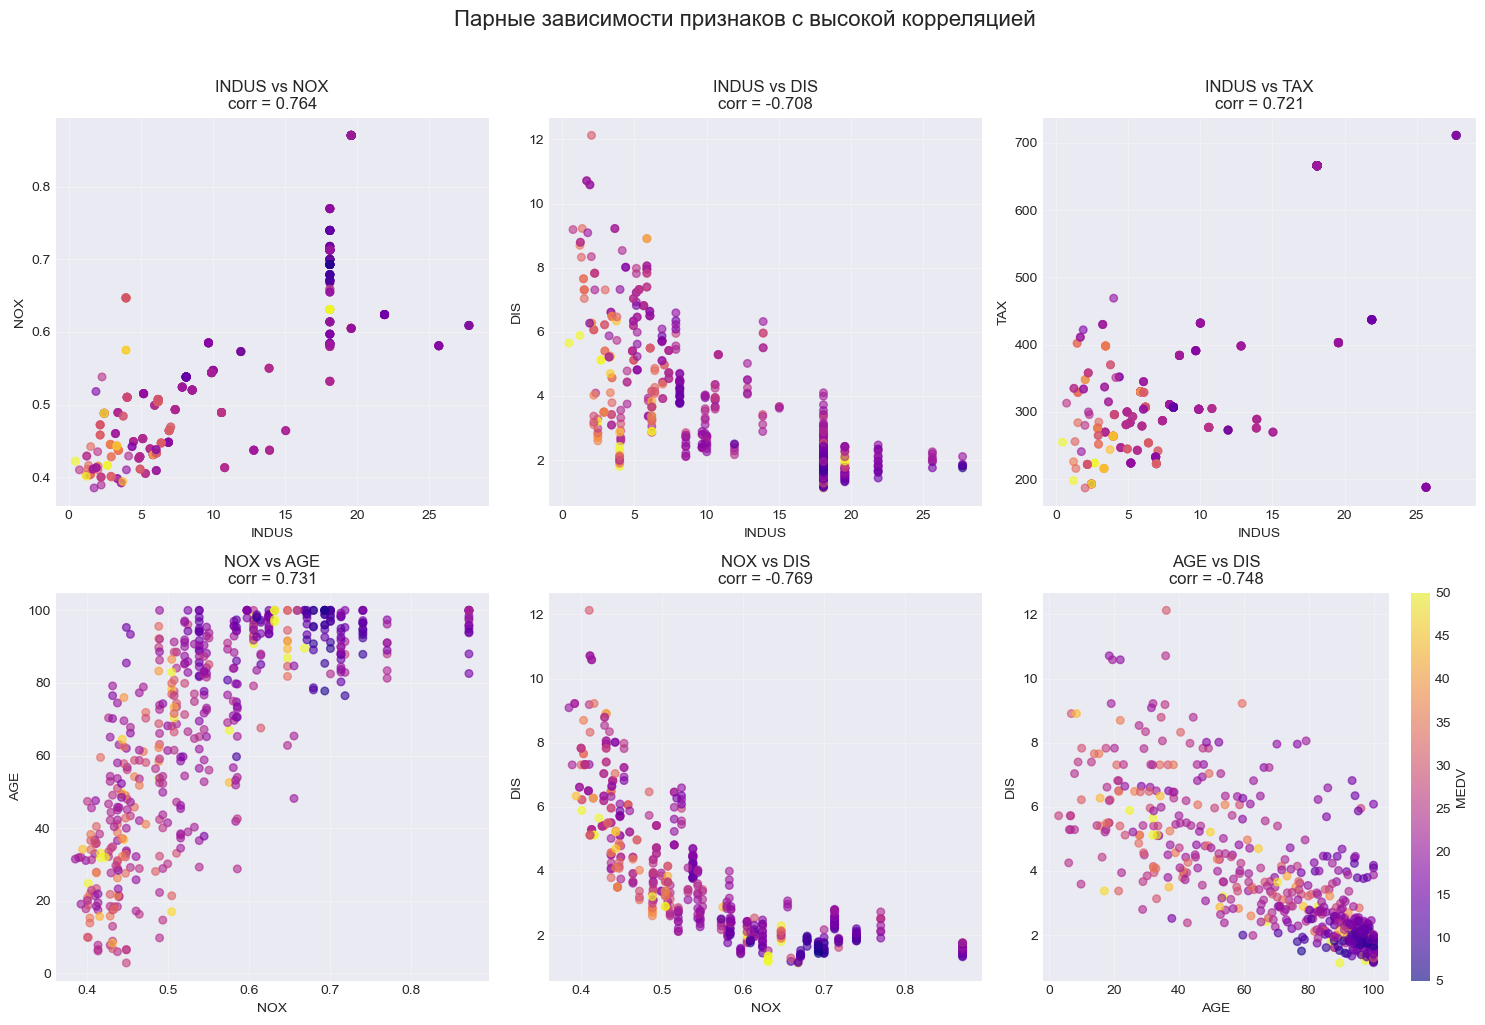

МНОГОМЕРНАЯ ВИЗУАЛИЗАЦИЯ (3D)


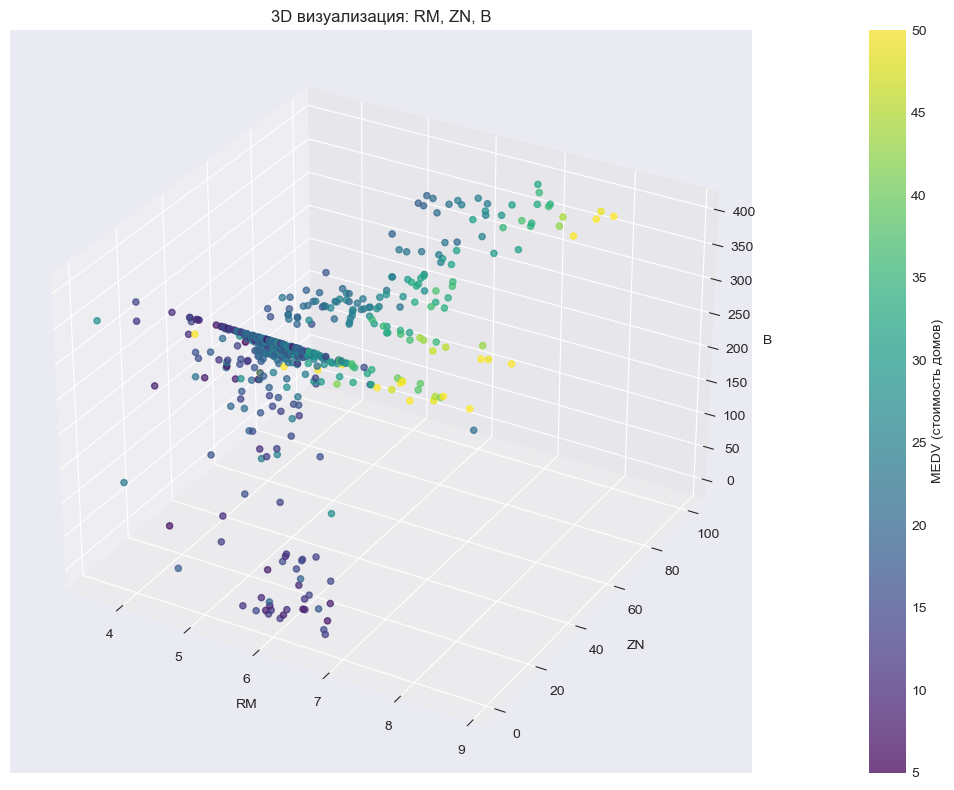

СОХРАНЕНИЕ РЕЗУЛЬТАТОВ

Сводная статистика по всем признакам:
    Признак  Среднее  Медиана  Стд. отклонение  Минимум  Максимум  Пропуски  Асимметрия  Эксцесс
0      CRIM    3.614    0.257            8.602    0.006    88.976         0       5.223   37.131
1        ZN   11.364    0.000           23.322    0.000   100.000         0       2.226    4.032
2     INDUS   11.137    9.690            6.860    0.460    27.740         0       0.295   -1.234
3      CHAS    0.069    0.000            0.254    0.000     1.000         0       3.406    9.638
4       NOX    0.555    0.538            0.116    0.385     0.871         0       0.729   -0.065
5        RM    6.284    6.208            0.702    3.561     8.780         0       0.409    1.907
6       AGE   68.575   77.500           28.149    2.900   100.000         0      -0.599   -0.968
7       DIS    3.795    3.207            2.106    1.130    12.126         0       1.012    0.488
8       RAD    9.549    5.000            8.707    1.000    24.000

In [10]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Загрузка данных
path = r"C:\Users\user\Downloads\BostonHousing.xlsx"
df = pd.read_excel(path)


print("АНАЛИЗ ДАННЫХ BOSTON HOUSING")

# Если данные в одной колонке с разделителями
if df.shape[1] == 1:
    print("\nОбнаружены данные в одной колонке. Разделяем...")
    # Определяем имена колонок для Boston Housing dataset
    column_names = [
        'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
    ]
    
    # Разделяем данные по запятым
    df = df.iloc[:, 0].str.split(',', expand=True)
    df.columns = column_names
    
    # Преобразуем все колонки в числовой формат
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"Размер данных: {df.shape}")
print(f"Количество признаков: {df.shape[1]}")
print(f"Количество наблюдений: {df.shape[0]}")

# Проверяем наличие пропущенных значений
print(f"\nПропущенные значения: {df.isnull().sum().sum()}")
if df.isnull().sum().sum() > 0:
    print("\nСтроки с пропущенными значениями:")
    print(df.isnull().sum())
    # Заполняем пропущенные значения медианой
    df = df.fillna(df.median())
    print("\nПропущенные значения заполнены медианами")


print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА")

print(df.describe().round(2))





print("РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (MEDV)")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Распределение целевой переменной MEDV (стоимость домов)', fontsize=16, y=1.02)

# Гистограмма
axes[0, 0].hist(df['MEDV'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(df['MEDV'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {df["MEDV"].mean():.2f}')
axes[0, 0].axvline(df['MEDV'].median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {df["MEDV"].median():.2f}')
axes[0, 0].set_xlabel('MEDV (тыс. $)')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Гистограмма распределения')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Boxplot
axes[0, 1].boxplot(df['MEDV'], vert=True, patch_artist=True,
                  boxprops=dict(facecolor='lightblue'),
                  medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('MEDV (тыс. $)')
axes[0, 1].set_title('Boxplot распределения')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot для проверки нормальности
stats.probplot(df['MEDV'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (проверка нормальности)')
axes[1, 0].grid(True, alpha=0.3)

# Плотность распределения
sns.kdeplot(df['MEDV'], ax=axes[1, 1], fill=True, color='blue', alpha=0.5)
axes[1, 1].set_xlabel('MEDV (тыс. $)')
axes[1, 1].set_ylabel('Плотность')
axes[1, 1].set_title('Плотность распределения')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистика по MEDV
print(f"\nСтатистика по MEDV:")
print(f"  Среднее: {df['MEDV'].mean():.2f}")
print(f"  Медиана: {df['MEDV'].median():.2f}")
print(f"  Стандартное отклонение: {df['MEDV'].std():.2f}")
print(f"  Минимум: {df['MEDV'].min():.2f}")
print(f"  Максимум: {df['MEDV'].max():.2f}")
print(f"  Коэффициент вариации: {(df['MEDV'].std()/df['MEDV'].mean()*100):.1f}%")
print(f"  Асимметрия: {df['MEDV'].skew():.3f}")
print(f"  Эксцесс: {df['MEDV'].kurtosis():.3f}")





print("РАСПРЕДЕЛЕНИЕ ВСЕХ ПРИЗНАКОВ")

# Выбираем только числовые признаки (исключая MEDV)
numeric_features = df.drop('MEDV', axis=1).select_dtypes(include=[np.number]).columns

# Создаем сетку графиков
n_cols = 3
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('Распределение числовых признаков', fontsize=16, y=1.02)

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    ax = axes[i]
    
    # Гистограмма
    ax.hist(df[feature].dropna(), bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(df[feature].mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.8)
    ax.set_title(f'{feature}\n(асимметрия: {df[feature].skew():.2f})', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Частота')
    ax.grid(True, alpha=0.3)
    
    # Добавляем статистику в угол
    stats_text = f'μ={df[feature].mean():.2f}\nσ={df[feature].std():.2f}'
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=8,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Скрываем пустые оси
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()




print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")

# Корреляционная матрица
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, mask=mask, linewidths=0.5, 
            cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица признаков', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Топ коррелирующих признаков с MEDV
corr_with_medv = corr_matrix['MEDV'].sort_values(ascending=False)
print("\nКорреляция признаков с MEDV (стоимостью домов):")
print(corr_with_medv.round(3))

# Визуализация корреляции с MEDV
plt.figure(figsize=(10, 6))
bars = plt.barh(corr_with_medv.index, corr_with_medv.values, 
                color=['green' if x > 0 else 'red' for x in corr_with_medv.values])
plt.axvline(x=0, color='black', linewidth=0.5)
plt.xlabel('Коэффициент корреляции')
plt.title('Корреляция признаков с целевой переменной MEDV', fontsize=14, pad=15)
plt.grid(True, alpha=0.3, axis='x')

# Добавляем значения на график
for bar, value in zip(bars, corr_with_medv.values):
    plt.text(value + (0.01 if value >= 0 else -0.03), bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', va='center', fontsize=9,
             color='white' if abs(value) > 0.5 else 'black')

plt.tight_layout()
plt.show()





print("ВИЗУАЛИЗАЦИЯ СВЯЗИ КЛЮЧЕВЫХ ПРИЗНАКОВ С MEDV")

# Выбираем топ-6 признаков по абсолютной корреляции с MEDV
top_features = corr_with_medv.drop('MEDV').abs().sort_values(ascending=False).head(6).index

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Взаимосвязь ключевых признаков с целевой переменной MEDV', fontsize=16, y=1.02)

axes = axes.flatten()

for i, feature in enumerate(top_features):
    ax = axes[i]
    
    # Точечный график
    scatter = ax.scatter(df[feature], df['MEDV'], alpha=0.6, s=20, 
                         c=df['MEDV'], cmap='viridis')
    ax.set_xlabel(feature)
    ax.set_ylabel('MEDV')
    
    # Линия регрессии
    z = np.polyfit(df[feature], df['MEDV'], 1)
    p = np.poly1d(z)
    ax.plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)
    
    corr_value = corr_matrix.loc[feature, 'MEDV']
    ax.set_title(f'{feature} vs MEDV\nr = {corr_value:.3f}', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Добавляем цветовую шкалу для MEDV
    if i == len(top_features) - 1:
        plt.colorbar(scatter, ax=ax, label='MEDV')

# Скрываем пустые оси
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()






print("АНАЛИЗ ВЫБРОСОВ")

# Boxplot для всех признаков
fig, axes = plt.subplots(2, 7, figsize=(20, 8))
fig.suptitle('Boxplot для выявления выбросов', fontsize=16, y=1.02)

axes = axes.flatten()

for i, feature in enumerate(df.columns):
    ax = axes[i]
    
    # Boxplot
    box = ax.boxplot(df[feature].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='red', linewidth=2),
                    flierprops=dict(marker='o', markerfacecolor='red', 
                                   markersize=5, alpha=0.5))
    ax.set_title(feature, fontsize=10)
    ax.set_ylabel('')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    # Количество выбросов (IQR метод)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    
    # Добавляем информацию о выбросах
    ax.text(0.95, 0.95, f'Выбросы: {outliers}', transform=ax.transAxes, 
            fontsize=8, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

# Статистика по выбросам
print("\nКоличество выбросов по признакам (метод IQR):")
for feature in df.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    if outliers > 0:
        print(f"  {feature}: {outliers} выбросов ({outliers/len(df)*100:.1f}%)")




print("ПАРНЫЕ ГРАФИКИ ДЛЯ ВЫСОКОКОРРЕЛИРОВАННЫХ ПРИЗНАКОВ")

# Выбираем признаки с высокой корреляцией между собой
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7 and i != j:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                                      corr_matrix.iloc[i, j]))

if high_corr_features:
    print(f"\nНайдено {len(high_corr_features)} пар с корреляцией > |0.7|:")
    for feat1, feat2, corr_val in high_corr_features:
        print(f"  {feat1} - {feat2}: {corr_val:.3f}")
    
    # Ограничим количество пар для визуализации
    high_corr_features = high_corr_features[:6]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Парные зависимости признаков с высокой корреляцией', fontsize=16, y=1.02)
    
    axes = axes.flatten()
    
    for idx, (feat1, feat2, corr_val) in enumerate(high_corr_features):
        ax = axes[idx]
        
        # Scatter plot
        scatter = ax.scatter(df[feat1], df[feat2], alpha=0.6, s=30, 
                            c=df['MEDV'], cmap='plasma')
        ax.set_xlabel(feat1)
        ax.set_ylabel(feat2)
        ax.set_title(f'{feat1} vs {feat2}\ncorr = {corr_val:.3f}', fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Цветовая шкала для MEDV
        if idx == len(high_corr_features) - 1:
            plt.colorbar(scatter, ax=ax, label='MEDV')
    
    # Скрываем пустые оси
    for j in range(idx+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("\nНет пар признаков с корреляцией > |0.7|")



print("МНОГОМЕРНАЯ ВИЗУАЛИЗАЦИЯ (3D)")

# Выбираем 3 наиболее коррелированных с MEDV признака для 3D визуализации
top_3_features = corr_with_medv.drop('MEDV').head(3).index

if len(top_3_features) >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 3D scatter plot
    scatter = ax.scatter(df[top_3_features[0]], df[top_3_features[1]], df[top_3_features[2]],
                        c=df['MEDV'], cmap='viridis', s=20, alpha=0.7)
    
    ax.set_xlabel(top_3_features[0])
    ax.set_ylabel(top_3_features[1])
    ax.set_zlabel(top_3_features[2])
    ax.set_title(f'3D визуализация: {top_3_features[0]}, {top_3_features[1]}, {top_3_features[2]}')
    
    # Добавляем цветовую шкалу
    cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label('MEDV (стоимость домов)')
    
    plt.tight_layout()
    plt.show()



print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")

# Сохраняем основные статистики
summary_stats = pd.DataFrame({
    'Признак': df.columns,
    'Среднее': df.mean().values,
    'Медиана': df.median().values,
    'Стд. отклонение': df.std().values,
    'Минимум': df.min().values,
    'Максимум': df.max().values,
    'Пропуски': df.isnull().sum().values,
    'Асимметрия': df.skew().values,
    'Эксцесс': df.kurtosis().values
})

print("\nСводная статистика по всем признакам:")
print(summary_stats.round(3).to_string())

# Сохраняем корреляционную матрицу
corr_summary = pd.DataFrame(corr_with_medv).round(3)
print("\n\nКорреляция всех признаков с MEDV:")
print(corr_summary.to_string())

# Сохраняем в файлы
summary_stats.to_csv('boston_housing_summary.csv', index=False, encoding='utf-8-sig')
corr_summary.to_csv('boston_housing_correlation.csv', encoding='utf-8-sig')

print("\nРезультаты сохранены в файлы:")
print("  - boston_housing_summary.csv (сводная статистика)")
print("  - boston_housing_correlation.csv (корреляция с MEDV)")


print("АНАЛИЗ ДАННЫХ ЗАВЕРШЕН!")

